In [1]:
import tensorflow as tf

# Loading "Minist Data Set"

## Containing Training samples = 60,000, Testing Samples = 10,000

### TensorFlow already contain MNIST data set which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist ##this is basically hadwritten characters based 28x28 sized images of 0 to 9

## After loading the MNIST data , Divide into train and Test dataset

In [3]:
## unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

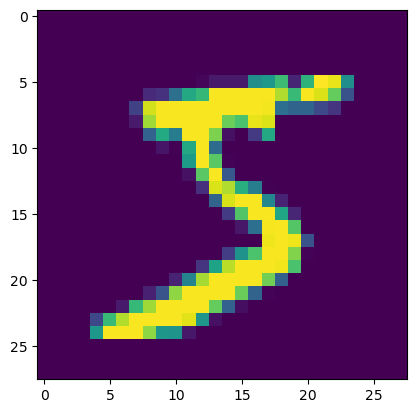

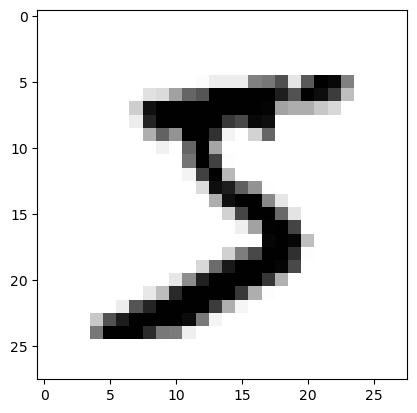

In [6]:
plt.imshow(x_train[0])
plt.show() ##+ in order to execute the graph
## however we dont know weather the image is colorful or binary image
## so in order to plot it change the cofiguration
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Checking the values of eache pixel
## Before Nprmalization

In [7]:
print (x_train[0]) ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As the imaged are in Gray Level(1 channel ==> 0 to 255), not colored(RGB)
# Normalizing the data | Pre-Processing Step

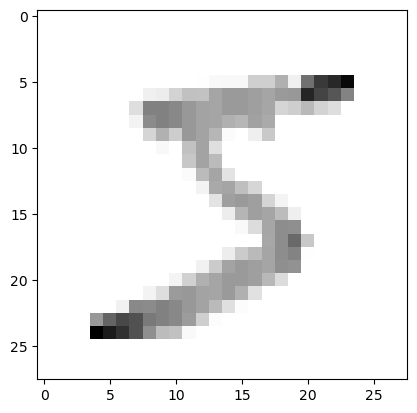

In [8]:
### you might have noticed that, its gray image and all values varies from 0 to 255 
### in order to normalize it

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

## After Normalizing

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0]) ### just to check that we have labels inside our network

5


## Resizing images to make it sutable for apply Convolution operation

In [11]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increaing one dimention for kernal operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ### increaing one dimention for kernal operation
print ("Training Samples dimention", x_trainr.shape)
print ("Testing Sampels dimention", x_testr.shape)

Training Samples dimention (60000, 28, 28, 1)
Testing Sampels dimention (10000, 28, 28, 1)


# Creating a Deep Nural Network
## Traaining on 60,000 samples on MNIST handWritten dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
### Creating a nural network now
model = Sequential()

### First Convolution Layers 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26 x 26
model.add(Conv2D(64, (3,3), input_shape = x_trainr .shape[1:])) ### only for first colvolution input layer size
model.add(Activation("relu")) ## activation function to make it non-linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) ## MaxPooling single maximum value of 2x2, 

### 2nd Convolution layer  26 - 3 + 1 = 24x24
model.add(Conv2D(64, (3,3))) ## 2nd Convolution Layer 
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling

#### 3rd Convolution Layer 
model.add(Conv2D(64, (3,3))) ## 3rd Convolution Layer 24x24
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling

### Fully Connected Layer #1 20x20 = 400
model.add (Flatten()) ## before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64)) ## nueural network layer
model.add(Activation("relu"))

### Fully Connected Layer #2
model.add (Dense(64))
model.add(Activation("relu"))

### Last Fully Connected Layer , output must be equal to number of classes, 10(0-9)
model.add (Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation("softmax")) #### activation function is changed to softmax (Class Probabilities)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3) ##Training my model

Epoch 1/5
1313/1313 [==============================] - 77s 57ms/step - loss: 0.3346 - accuracy: 0.8921 - val_loss: 0.1415 - val_accuracy: 0.9541
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.0795 - val_accuracy: 0.9742
Epoch 3/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0672 - val_accuracy: 0.9789
Epoch 4/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0584 - accuracy: 0.9817 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 5/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0628 - val_accuracy: 0.9813


In [18]:
### Evaluation on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print ("Test loss on 10,000 test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.0611 - accuracy: 0.9826
Test loss on 10,000 test samples 0.06112883239984512
Validation Accuracy on 10,000 test samples 0.9825999736785889


In [19]:
# prediction = new_model.predict([x_test]) ## there is specialized method for efficeintly saving your model, to name all input
 ## therefore instead of using new model loaded , for now only for prediction I am using simple model
prediction = model.predict([x_testr])

313/313 [==============================] - 5s 15ms/step


In [20]:
print (prediction)

[[1.9058463e-07 5.0971175e-06 3.5059045e-06 ... 9.9995029e-01
  8.7675200e-09 2.7914548e-05]
 [2.0333830e-05 2.0050002e-06 9.9992847e-01 ... 1.7758423e-06
  1.6006934e-06 6.3600455e-06]
 [3.2077781e-07 9.9986398e-01 2.9226463e-05 ... 4.2492185e-05
  2.4922556e-06 1.5802162e-06]
 ...
 [1.9602693e-08 2.4908021e-08 2.3680329e-09 ... 3.0279157e-06
  4.0674686e-07 3.3095814e-06]
 [3.8214521e-06 2.7780783e-07 3.1871775e-08 ... 4.4062439e-08
  1.0017932e-03 5.2129330e-05]
 [2.4309114e-04 2.0546453e-07 5.9787380e-06 ... 3.6770251e-07
  4.5476318e-05 1.6517855e-05]]


In [21]:
print (np.argmax(prediction[0]))

7


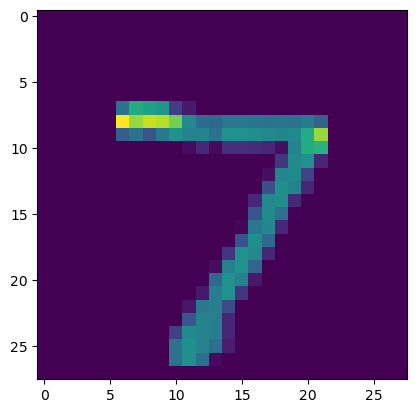

In [22]:
plt.imshow(x_test[0])

In [23]:
print (np.argmax(prediction[128]))

8


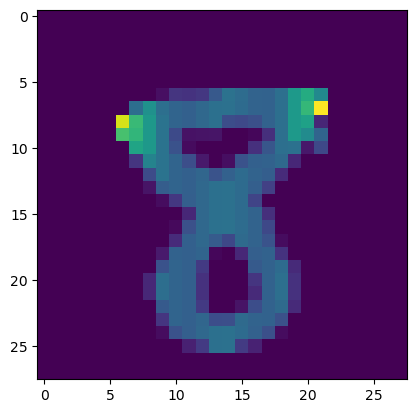

In [24]:
plt.imshow(x_test[128])

## Reading and analyzing image and predict the number based on the trained model 

In [25]:
import cv2

In [26]:
img = cv2.imread('test_3.jpg')

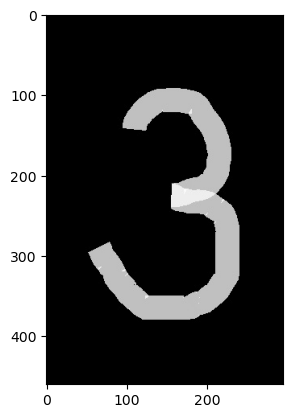

In [27]:
plt.imshow(img)

In [28]:
img.shape

(460, 294, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(460, 294)

In [31]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

In [33]:
newimg = tf.keras.utils.normalize (resized, axis =1)

In [34]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
prediction = model.predict(newimg)

1/1 [==============================] - 0s 176ms/step


In [37]:
print (np.argmax(prediction))

3


In [38]:
img2 = cv2.imread('nine.png')

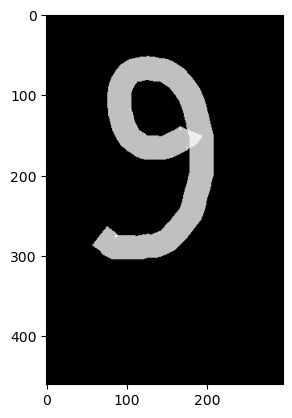

In [40]:
plt.imshow(img2)

In [39]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [41]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [42]:
newimg = tf.keras.utils.normalize (resized, axis =1)

In [43]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [44]:
prediction = model.predict(newimg)

1/1 [==============================] - 0s 72ms/step


In [45]:
print (np.argmax(prediction))

9
